For your lab, you are tasked to grab a 2 csv files (with normal distribution) from the valid sources in the internet, perform a complete and detailed hypothesis test, determine what test to be used for each of your dataset. We will continue and present it in the next

*Note: Don't be discouraged if it gets hard to find a normally distributed data, it shows you that in the real world, data is not always perfect.*

1. Normality tests
2. Hypothesis testing

**First csv file with normal distribution**

 https://www.kaggle.com/datasets/thedevastator/unlocking-achievement-understanding-california-s

 The California Department of Education (CDE) present the 2015-2016 SAT Test Results.

Does the average SAT score in Reading differ significantly among the different school districts?

Null Hypothesis (H0): There is no significant difference in the average SAT scores (Reading) among the different school districts.

Alternative Hypothesis (H1): There is a significant difference in the average SAT scores (Reading) among the different school districts.

**1. Visual Inspection:**

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("SAT.csv")

# Print the index of the DataFrame
print(df.index)

print(df.columns)

RangeIndex(start=0, stop=2334, step=1)
Index(['index', 'cds', 'rtype', 'sname', 'dname', 'cname', 'enroll12',
       'NumTstTakr', 'AvgScrRead', 'AvgScrMath', 'AvgScrWrit', 'NumGE1500',
       'PctGE1500', 'year'],
      dtype='object')


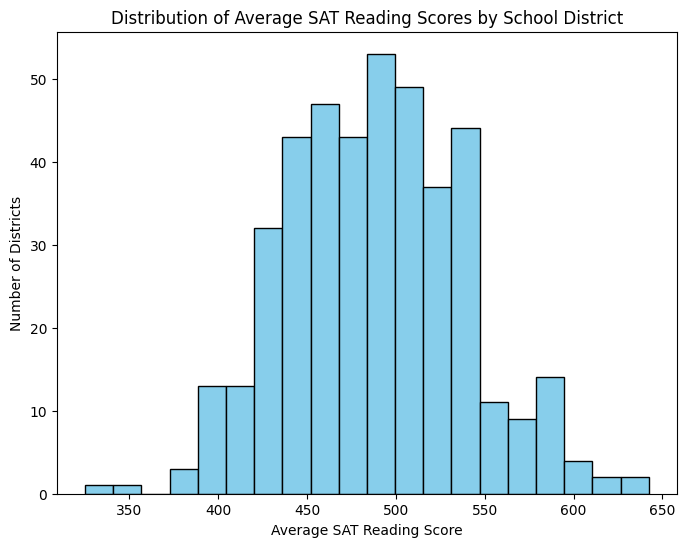

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for Reading only
plt.figure(figsize=(8, 6))

# Histogram for Reading
plt.hist(district_mean_scores['AvgScrRead'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average SAT Reading Scores by School District')
plt.xlabel('Average SAT Reading Score')
plt.ylabel('Number of Districts')

# Show plot
plt.show()



**2. Statistical Tests:** Shapiro-Wilk Test

In [ ]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for each subject
for subject in ['AvgScrRead']:
    # Perform Shapiro-Wilk test
    stat, p = shapiro(district_mean_scores[subject])

    # Print the result
    print(f"Shapiro-Wilk test for {subject}:")
    print(f"Statistic: {stat}, p-value: {p}")

    # Determine the interpretation
    alpha = 0.05
    if p > alpha:
        print("Sample looks Gaussian (fail to reject H0)")
    else:
        print("Sample does not look Gaussian (reject H0)")
    print()



Shapiro-Wilk test for AvgScrRead:
Statistic: 0.9958621859550476, p-value: 0.3372238278388977
Sample looks Gaussian (fail to reject H0)



Shapiro-Wilk test for AvgScrRead:
Statistic: 0.9958621859550476, p-value: 0.3372238278388977.
Sample looks Gaussian (fail to reject H0).

p-value > 0.05 (significance level) we fail to reject H0.

Sample looks Gaussian and appears that SAT scores for Reading approximately follow a normal distribution.

**3. Quantifying Skewness and Kurtosis:**

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for the average SAT scores of Reading
skewness_reading = skew(district_mean_scores['AvgScrRead'])
kurtosis_reading = kurtosis(district_mean_scores['AvgScrRead'])

print("Skewness of AvgScrRead:", skewness_reading)
print("Kurtosis of AvgScrRead:", kurtosis_reading)


Skewness of AvgScrRead: 0.15560924797927672
Kurtosis of AvgScrRead: 0.04471557040351248


Skewness and kurtosis give insight to shape of distribution for Reading.

Skewness: 0.1556 is close to zero indicating the distribution is approximately symmetric. And the fact it is a positive value, it suggests a slight right skew or slightly longer tail on the right side. Overall, the distribution is close to being symmetrically distributed around the mean.

Kurtosis: 0.0447 is close to zero indicating the distribution has low kurtosis (distribution is close to a normal distribution) with a relatively flat peak and lighter tails (fewer very high/very low values) compared to a normal distribution and does not have significant outliers or extremes in the dataset.



**4. Anova**

In [4]:
from scipy.stats import f_oneway

# Load the CSV file into a DataFrame
df = pd.read_csv("SAT.csv")

# Convert 'AvgScrRead' to numeric, coercing errors to NaN
df['AvgScrRead'] = pd.to_numeric(df['AvgScrRead'], errors='coerce')

# Drop rows with NaN values in 'AvgScrRead'
df = df.dropna(subset=['AvgScrRead'])

# Prepare data for ANOVA
groups = [group['AvgScrRead'].values for name, group in df.groupby('dname')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA result: F-statistic = {f_stat}, p-value = {p_value}")
if p_value > 0.05:
    print("Fail to reject H0: No significant difference in average SAT Reading scores among school districts.")
else:
    print("Reject H0: Significant difference in average SAT Reading scores among school districts.")


ANOVA result: F-statistic = 8.322859123741512, p-value = 2.26338616761697e-188
Reject H0: Significant difference in average SAT Reading scores among school districts.


ANOVA result:

F-statistic = 8.322859123741512 A higher number generally suggests that the between group variance is > within group variance.

p-value = 2.26338616761697e-188 < 0.05 (apha) and is near 0 suggesting we reject H0.

Reject H0: Significant difference in average SAT Reading scores among school districts.

**Conclusion:**

The average SAT Reading scores across school districts follow a normal distribution, indicated by Shaprio-Wilk testing, skewness, and kurtosis values.

The ANOVA results reveal that the average SAT Reading scores are not the same across all school districts. There's statistically significant differences in the average scores among the districts.

This leads us to reject H0 (Null Hypothesis (H0): There is no significant difference in the average SAT scores (Reading) among the different school districts).




**Second csv file with normal distribution**

https://www.kaggle.com/datasets/uciml/iris

Is there a significant difference in the sepal widths between different species of iris flowers?

Null(H0): There is no significant difference in the sepal widths between different species of iris flowers.

Alternative(H1): There is a significant difference in the sepal widths between different species of iris flowers.

**1. Visual Inspection:**

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Iris.csv")

# Display the column names
print(df.columns)





Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


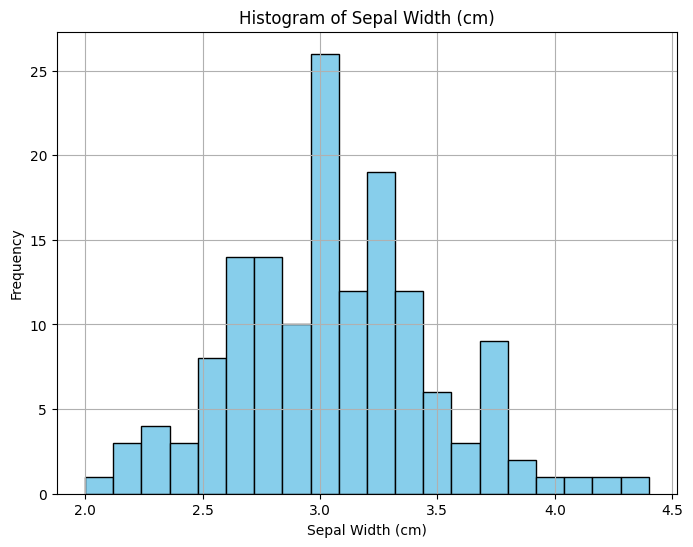

In [6]:
import matplotlib.pyplot as plt

# Selecting the 'SepalWidthCm' column
sepal_width = df['SepalWidthCm']

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(sepal_width, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sepal Width (cm)')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**2. Statistical Tests:** Shapiro-Wilk Test

In [7]:
import pandas as pd
from scipy.stats import shapiro

# List to store columns that are normally distributed
normally_distributed_columns = []

# Iterate over each column in the DataFrame
for column in df.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(df[column]):
        # Perform Shapiro-Wilk test
        stat, p = shapiro(df[column])
        # Check if p-value is greater than alpha (0.05) to determine normality
        if p > 0.05:
            normally_distributed_columns.append(column)

# Print columns that are normally distributed
print("Columns with normally distributed data:", normally_distributed_columns)

Columns with normally distributed data: ['SepalWidthCm']


In [8]:
# Perform Shapiro-Wilk test for 'SepalWidthCm'
stat, p = shapiro(df['SepalWidthCm'])

# Print the p-value
print("The p-value of the Shapiro-Wilk test for 'SepalWidthCm' is:", p)


The p-value of the Shapiro-Wilk test for 'SepalWidthCm' is: 0.07518772780895233


The p-value of the Shapiro-Wilk test for 'SepalWidthCm' is: 0.07518772780895233. This is > 0.05 (significance level) we fail to reject the null hypothesis. It appears to follow normal distribution.

**3. Quantifying Skewness and Kurtosis:**

In [9]:
from scipy.stats import skew, kurtosis

# Compute skewness and kurtosis for 'SepalWidthCm'
sepal_width_skewness = skew(df['SepalWidthCm'])
sepal_width_kurtosis = kurtosis(df['SepalWidthCm'])

print("Skewness of 'SepalWidthCm':", sepal_width_skewness)
print("Kurtosis of 'SepalWidthCm':", sepal_width_kurtosis)


Skewness of 'SepalWidthCm': 0.330702812773315
Kurtosis of 'SepalWidthCm': 0.24144329938318343


Skewness of 'SepalWidthCm': 0.330702812773315. As it is positive, it indicates a slight right skewness, indicating the distribution has a longer tail on the right side.

Kurtosis of 'SepalWidthCm': 0.24144329938318343. As the value is less than 3 it suggests the distribution is flatter than a normal distribution; meaning it has fewer extreme values.

It is close to symmetric with a slight right skewness and slightly flatter.

**4. Anova**

In [10]:
from scipy.stats import f_oneway

# Prepare data for ANOVA
groups = [group['SepalWidthCm'].values for name, group in df.groupby('Species')]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA result: F-statistic = {f_stat}, p-value = {p_value}")

# Conclusion based on p-value
if p_value > 0.05:
    print("Fail to reject H0: No significant difference in sepal widths between species.")
else:
    print("Reject H0: Significant difference in sepal widths between species.")


ANOVA result: F-statistic = 47.36446140299382, p-value = 1.3279165184572242e-16
Reject H0: Significant difference in sepal widths between species.


ANOVA result:

F-statistic = 47.36446140299382, is quite large, indicating there is substantial variation in sepal widths within each species.

p-value = 1.3279165184572242e-16 < 0.05 (alpha) thus we reject the null hypotheses.

Reject H0: Significant difference in sepal widths between species.

**Conclusion:**

Since p-value from the Shapiro-Wilk test for is 0.075 and it is > significance level 0.05, we fail to reject the null hypothesis. There is insufficient evidence to conclude that there is a difference in the sepal widths between different species of iris flowers. We fail to reject the null hypothesis.

The Anova test has a p-value < 0.05, thus we reject the H0 that there is no significant difference in sepal widths between different species.

The sepal widths within each species of the iris are reasonably approimated by a normal distribution. There is statistically significant difference between the different species as indicated by Anova.


It is very difficult to find normal distribution in real data.